# Importing Libraries

In [ ]:
# -------------------- IMPORTS --------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score, roc_auc_score
)

from sklearn.ensemble import (
    AdaBoostClassifier, VotingClassifier, StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks


# 📌 Genetic Algorithm-based Feature Selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import random

from scipy.stats import rankdata

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings('ignore')

# Generate synthetic data for demonstration purposes
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

!pip install -q pyswarm
from pyswarm import pso


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/fetal dataset /balanced_ga_dataset_normalized.csv')
X = data.drop('class', axis=1)
y = data['class'] - 1  # Adjust class labels from 1,2,3 to 0,1,2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [ ]:
# 👀 Preview the data
print(data.head())
print("\n🔎 Dataset Info:")
print(data.info())

   accelerations  uterine_contractions  light_decelerations  \
0      -0.527707             -1.151982            -0.627121   
1       0.814287             -0.838256             0.281542   
2      -0.527707             -1.151982            -0.627121   
3      -0.527707             -1.151982            -0.627121   
4      -0.527707             -0.524529             1.493093   

   abnormal_short_term_variability  \
0                         0.517117   
1                         0.282375   
2                        -0.011053   
3                         0.751859   
4                         0.165004   

   percentage_of_time_with_abnormal_long_term_variability  histogram_width  \
0                                           0.097088             -0.916531   
1                                          -0.725245              1.144309   
2                                          -0.255341             -1.120350   
3                                           0.097088             -1.029764   
4 

In [ ]:
# 🔍 Check for missing values
print("\n🧼 Missing Values Check:")
print(data.isnull().sum())


🧼 Missing Values Check:
accelerations                                             0
uterine_contractions                                      0
light_decelerations                                       0
abnormal_short_term_variability                           0
percentage_of_time_with_abnormal_long_term_variability    0
histogram_width                                           0
histogram_max                                             0
histogram_number_of_zeroes                                0
histogram_median                                          0
histogram_variance                                        0
histogram_tendency                                        0
class                                                     0
dtype: int64


In [ ]:
# 🎯 Separate Features and Target
X = data.drop('class', axis=1)
y = data['class']

# 🏷️ If the target is categorical, encode it
if y.dtypes == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("✅ Target column encoded.")

In [ ]:
# 🧪 Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n📊 Shape of Train and Test sets:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


📊 Shape of Train and Test sets:
X_train: (3950, 11)
X_test : (988, 11)
y_train: (3950,)
y_test : (988,)


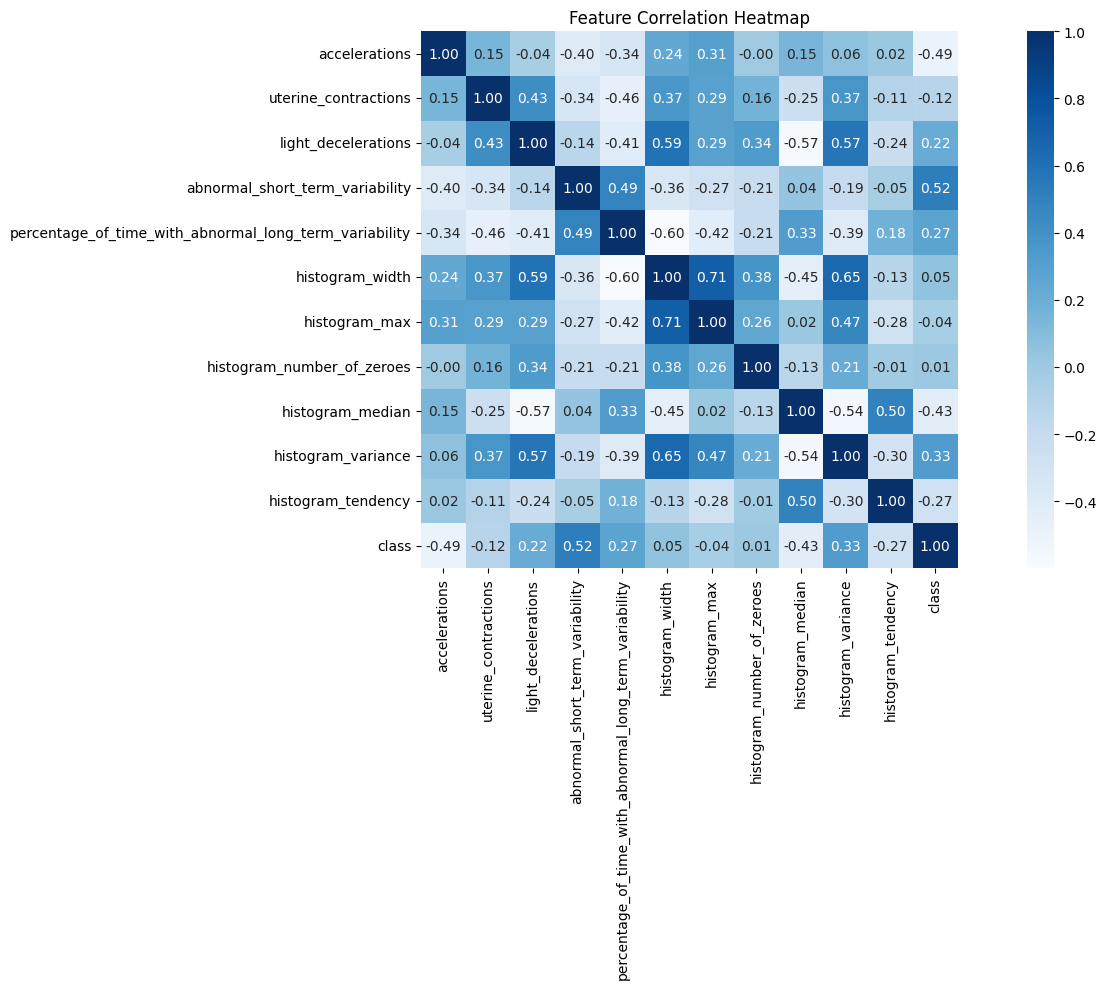

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your original dataset before splitting
corr_matrix = data.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', square=True)
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Balancing Dataset Techniques

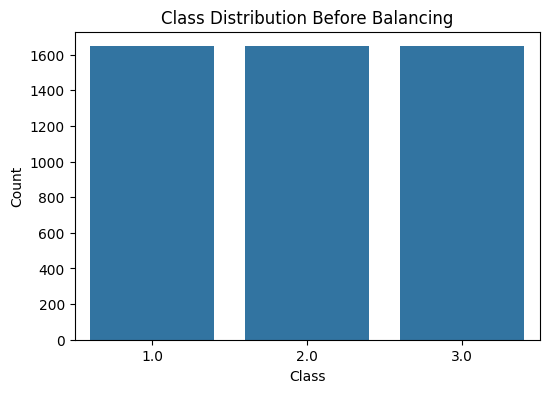

In [ ]:

# Plot class distribution before balancing
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Classifier and scaler
clf = AdaBoostClassifier()
scaler = StandardScaler()

# Define balancing techniques
balancers = {
    'SMOTEENN': SMOTEENN(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'TomekLinks': TomekLinks(),
    'SMOTETomek': SMOTETomek(random_state=42)
}
# Directory to save balanced datasets
save_dir = '/content/drive/MyDrive/fetal dataset /Saved Balanced dataset '
os.makedirs(save_dir, exist_ok=True)





In [ ]:
# Evaluate each technique
results = {}
balanced_distributions = {}

for name, method in balancers.items():
    X_res, y_res = method.fit_resample(X, y)

    # Save balanced dataset to CSV
    balanced_data = pd.DataFrame(X_res, columns=X.columns)
    balanced_data['class'] = y_res + 1  # Convert back to original class labels 1, 2, 3
    file_path = os.path.join(save_dir, f'balanced_dataset_{name}.csv')
    balanced_data.to_csv(file_path, index=False)

    # Save class distribution after balancing
    balanced_distributions[name] = pd.Series(y_res).value_counts()

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }



# After Balancing

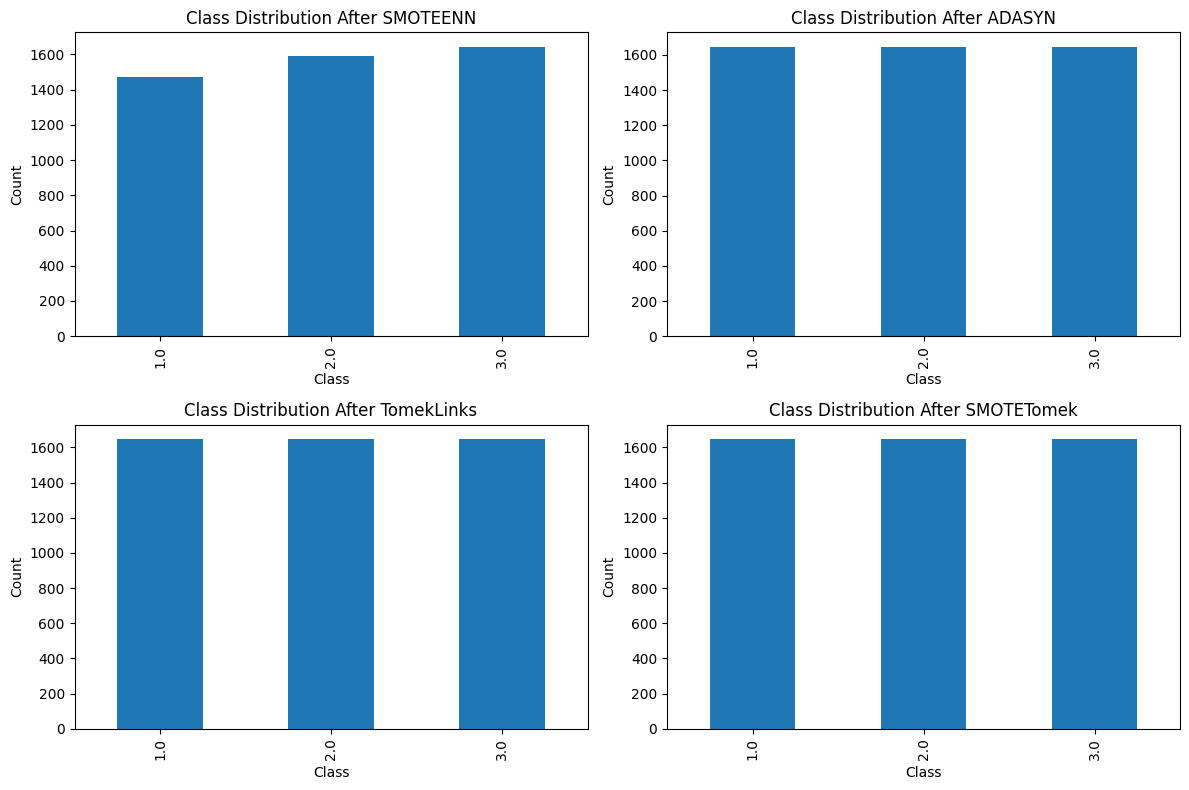

In [ ]:
# Plot class distributions after balancing
plt.figure(figsize=(12, 8))
for i, (name, dist) in enumerate(balanced_distributions.items(), 1):
    plt.subplot(2, 2, i)
    dist.sort_index().plot(kind='bar')
    plt.title(f'Class Distribution After {name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()



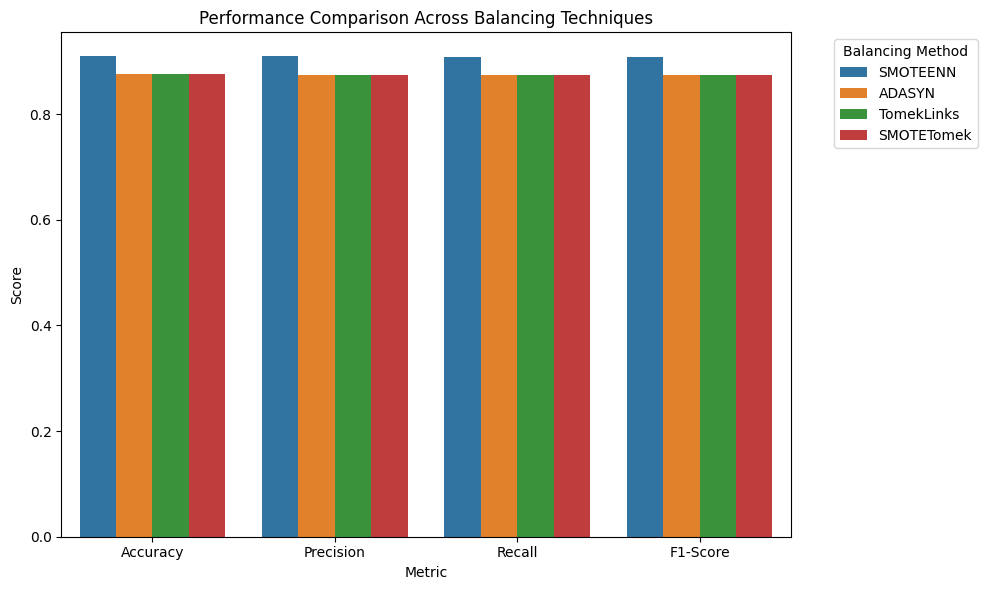

In [ ]:
# Results dataframe
results_df = pd.DataFrame(results).T.sort_values(by='Accuracy', ascending=False)
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Balancing Method'}, inplace=True)

# Plotting metrics comparison
plt.figure(figsize=(10, 6))
results_melted = results_df.melt(id_vars='Balancing Method', var_name='Metric', value_name='Score')
sns.barplot(data=results_melted, x='Metric', y='Score', hue='Balancing Method')
plt.title('Performance Comparison Across Balancing Techniques')
plt.legend(title='Balancing Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [ ]:
# Print final results and best method
print("\nComparison of Balancing Techniques:\n")
print(results_df)

best_method = results_df.iloc[0]['Balancing Method']
print(f"\n✅ The best balancing technique based on Accuracy is: **{best_method}**")



Comparison of Balancing Techniques:

  Balancing Method  Accuracy  Precision    Recall  F1-Score
0         SMOTEENN  0.909671   0.909573  0.908052  0.907789
1           ADASYN  0.875506   0.874766  0.874866  0.874548
2       TomekLinks  0.875506   0.874766  0.874866  0.874548
3       SMOTETomek  0.875506   0.874766  0.874866  0.874548

✅ The best balancing technique based on Accuracy is: **SMOTEENN**


# Model Evaluation

In [ ]:
# -------------------- LOAD BEST DATA FOR MODEL EVAL --------------------
best_balanced = pd.read_csv(os.path.join(save_dir, f'balanced_dataset_{best_method}.csv'))
X = best_balanced.drop('class', axis=1)
y = best_balanced['class'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'AdaBoost': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}




Classification Report for AdaBoost:
              precision    recall  f1-score   support

         1.0       0.92      0.84      0.88       305
         2.0       0.86      0.92      0.89       299
         3.0       0.94      0.96      0.95       337

    accuracy                           0.91       941
   macro avg       0.91      0.91      0.91       941
weighted avg       0.91      0.91      0.91       941

--------------------------------------------------------------------------------

Classification Report for GaussianNB:
              precision    recall  f1-score   support

         1.0       0.88      0.83      0.85       305
         2.0       0.62      0.85      0.72       299
         3.0       0.84      0.60      0.70       337

    accuracy                           0.75       941
   macro avg       0.78      0.76      0.76       941
weighted avg       0.78      0.75      0.75       941

--------------------------------------------------------------------------------


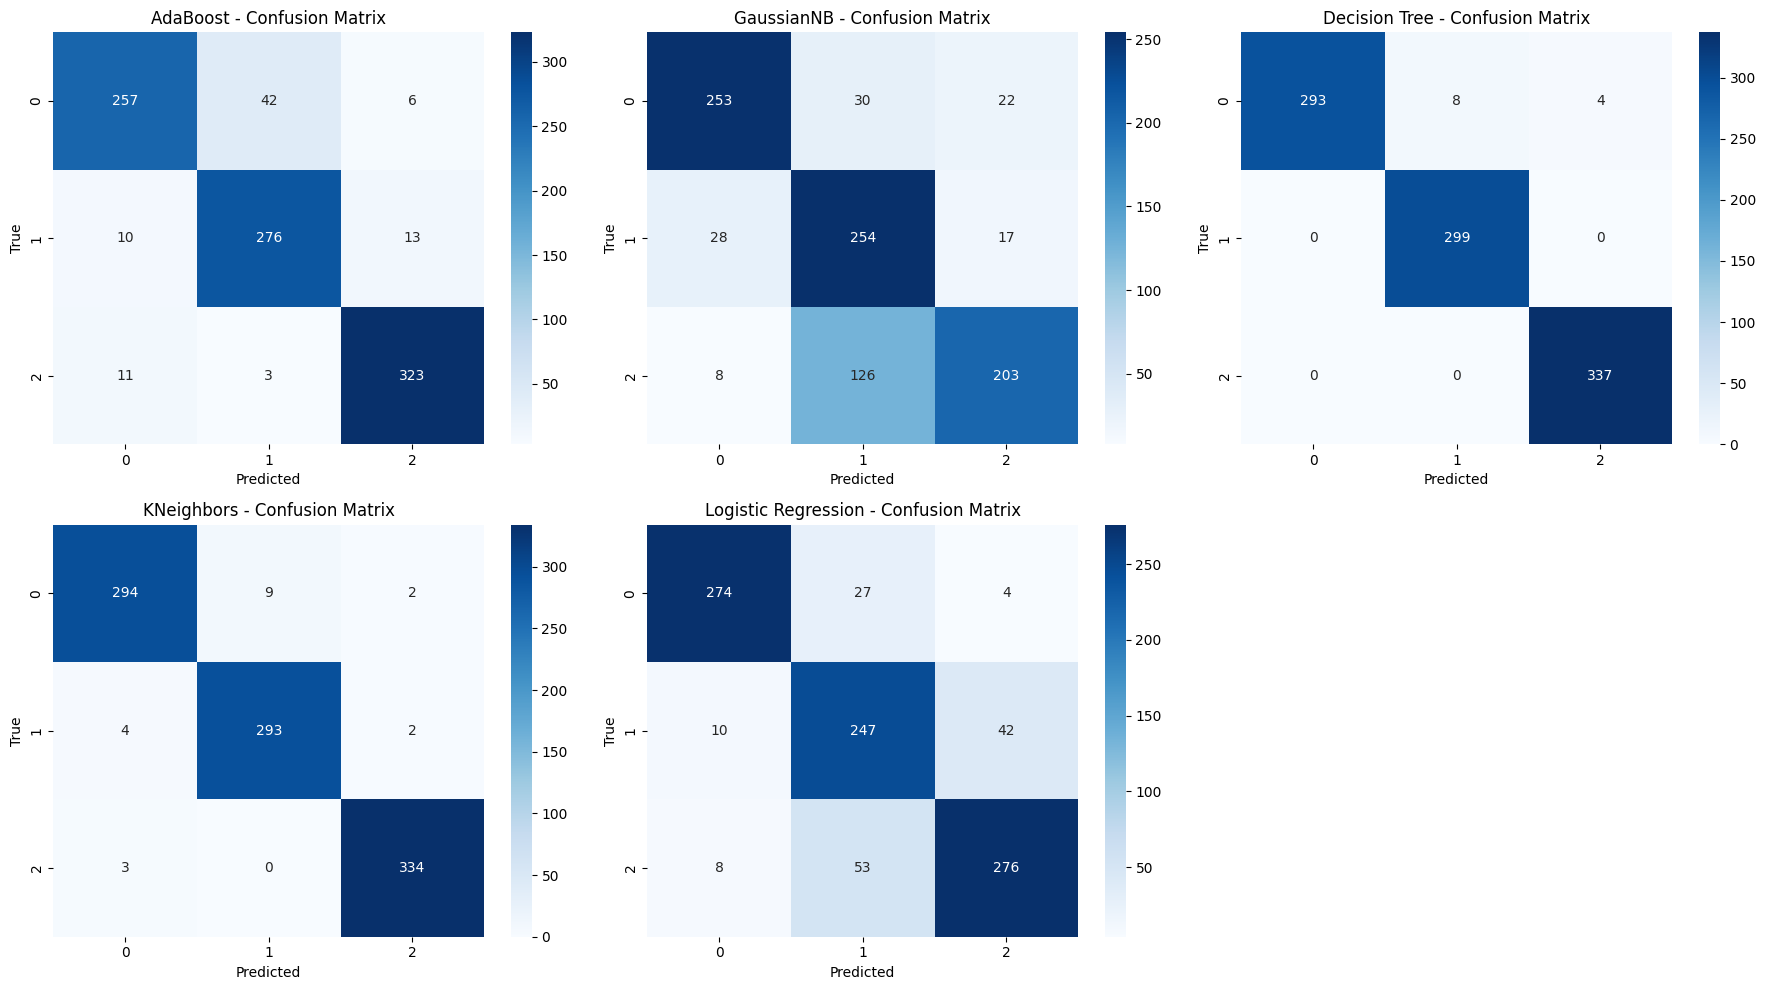

In [ ]:
# -------------------- EVALUATE MODELS --------------------
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()

roc_results = {}
pr_results = []
comparative_metrics = []

y_test_bin = label_binarize(y_test, classes=np.unique(y))

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_test_scaled)
    y_pred = model.predict(X_test_scaled)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=axs[idx])
    axs[idx].set_title(f'{name} - Confusion Matrix')
    axs[idx].set_xlabel('Predicted')
    axs[idx].set_ylabel('True')

    # ROC and PR calculations
    roc_results[name] = []
    pr_model_results = []

    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)

        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
        pr_auc = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

        roc_results[name].append((fpr, tpr, roc_auc))
        pr_model_results.append((precision, recall, pr_auc))

    pr_results.append((name, pr_model_results))

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_avg = precision_score(y_test, y_pred, average='macro')
    recall_avg = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc_score = np.mean([score[2] for score in roc_results[name]])
    aucpr_score = np.mean([score[2] for score in pr_model_results])

    comparative_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision_avg,
        'Recall': recall_avg,
        'F1-Score': f1,
        'AUC': auc_score,
        'AUCPR': aucpr_score
    })

    # Print Classification Report
    print(f"\nClassification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print("-" * 80)

# ✅ Remove extra subplot if not all 6 are used
if len(models) < 6:
    for i in range(len(models), 6):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


Comparative Metrics Table:
                 Model  Accuracy  Precision    Recall  F1-Score       AUC  \
0             AdaBoost  0.909671   0.909573  0.908052  0.907789  0.974978   
1           GaussianNB  0.754516   0.777929  0.760460  0.756521  0.910048   
2        Decision Tree  0.987248   0.987404  0.986885  0.986944  0.990262   
3           KNeighbors  0.978746   0.978370  0.978322  0.978323  0.999479   
4  Logistic Regression  0.846971   0.850284  0.847813  0.848231  0.953820   

      AUCPR  
0  0.948074  
1  0.847850  
2  0.978540  
3  0.998497  
4  0.904874  


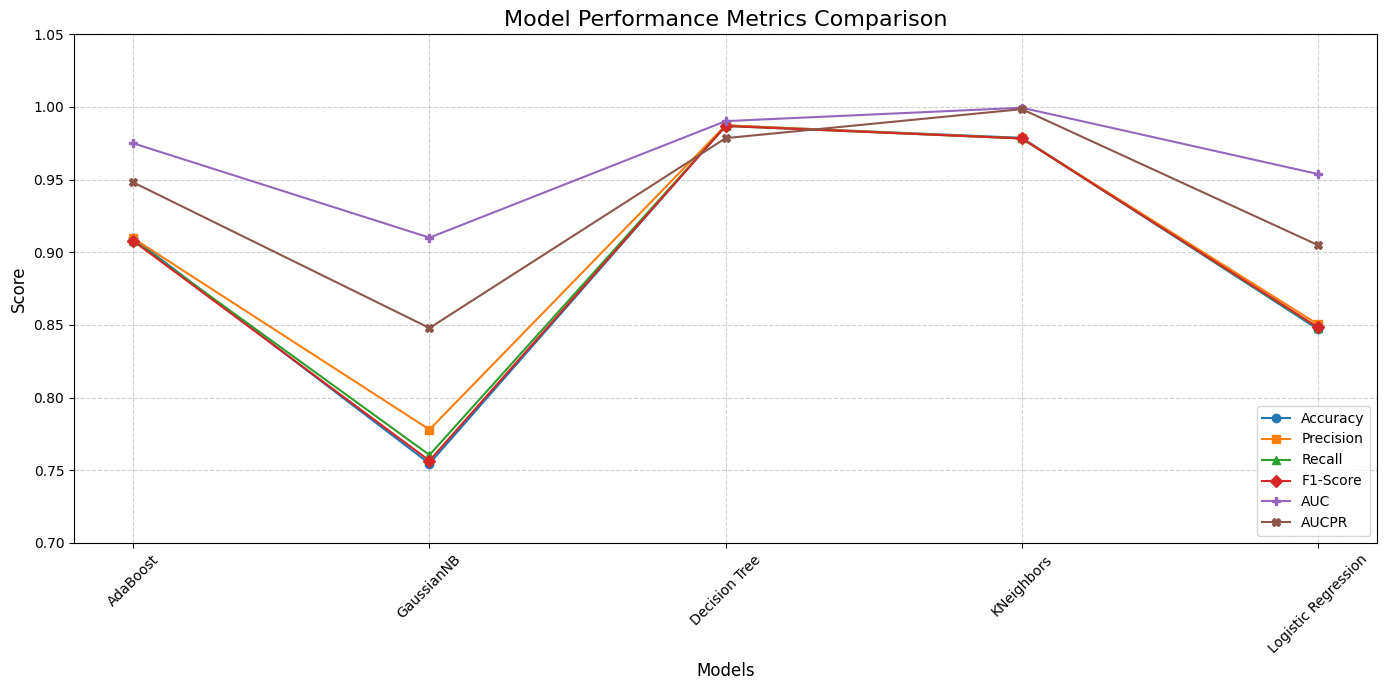

In [ ]:
# -------------------- COMPARATIVE METRICS --------------------
comparative_df = pd.DataFrame(comparative_metrics)
print("\nComparative Metrics Table:")
print(comparative_df)

# Extract metrics from your existing comparative_metrics list
model_names = [entry['Model'] for entry in comparative_metrics]
accuracy = [entry['Accuracy'] for entry in comparative_metrics]
precision = [entry['Precision'] for entry in comparative_metrics]
recall = [entry['Recall'] for entry in comparative_metrics]
f1_score_vals = [entry['F1-Score'] for entry in comparative_metrics]
auc = [entry['AUC'] for entry in comparative_metrics]
aucpr = [entry['AUCPR'] for entry in comparative_metrics]

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(model_names, accuracy, marker='o', label='Accuracy')
plt.plot(model_names, precision, marker='s', label='Precision')
plt.plot(model_names, recall, marker='^', label='Recall')
plt.plot(model_names, f1_score_vals, marker='D', label='F1-Score')
plt.plot(model_names, auc, marker='P', label='AUC')
plt.plot(model_names, aucpr, marker='X', label='AUCPR')

plt.title("Model Performance Metrics Comparison", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(0.7, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()

# Save or show
plt.savefig("all_model_metrics_comparison.png", dpi=300)
plt.show()




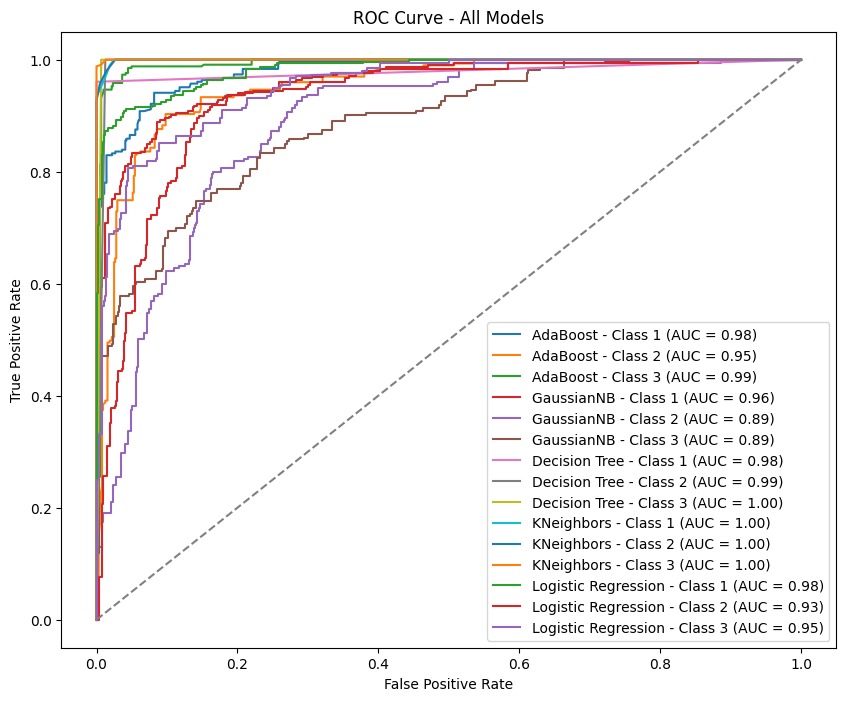

In [ ]:
# -------------------- ROC CURVES --------------------
plt.figure(figsize=(10, 8))
for name, results in roc_results.items():
    for i, (fpr, tpr, roc_auc) in enumerate(results):
        plt.plot(fpr, tpr, label=f'{name} - Class {i+1} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All Models')
plt.legend(loc='lower right')
plt.show()




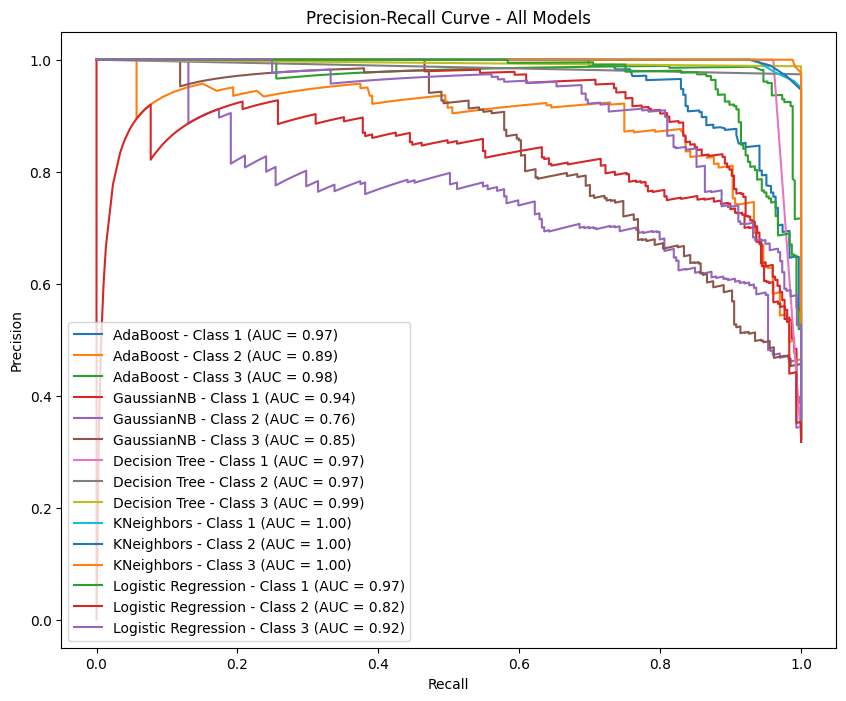

In [ ]:
# -------------------- PR CURVES --------------------
plt.figure(figsize=(10, 8))
for name, pr_data in pr_results:
    for i, (precision, recall, pr_auc) in enumerate(pr_data):
        plt.plot(recall, precision, label=f'{name} - Class {i+1} (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - All Models')
plt.legend(loc='lower left')
plt.show()

# TOPSIS

In [ ]:
# -------------------- TOPSIS RANKING --------------------
df_norm = comparative_df.drop(columns='Model')
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())

ideal = df_norm.max()
anti_ideal = df_norm.min()
D_plus = np.sqrt(((df_norm - ideal) ** 2).sum(axis=1))
D_minus = np.sqrt(((df_norm - anti_ideal) ** 2).sum(axis=1))
comparative_df['TOPSIS Score'] = D_minus / (D_plus + D_minus)
comparative_df['Rank'] = comparative_df['TOPSIS Score'].rank(ascending=False)

print("\nTOPSIS Ranking:")
print(comparative_df[['Model', 'TOPSIS Score', 'Rank']].sort_values(by='Rank'))


TOPSIS Ranking:
                 Model  TOPSIS Score  Rank
3           KNeighbors      0.968503   1.0
2        Decision Tree      0.933534   2.0
0             AdaBoost      0.665138   3.0
4  Logistic Regression      0.399884   4.0
1           GaussianNB      0.000000   5.0


# Ensemble Techniques using PSO  

In [ ]:
# Define base models
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)

### --- 1. PSO Weighted Ensemble (Corrected) --- ###
def pso_objective(weights):
    weights = np.abs(weights)
    weights = weights / sum(weights)

    y_prob_dt = dt.fit(X_train, y_train).predict_proba(X_test)
    y_prob_knn = knn.fit(X_train, y_train).predict_proba(X_test)

    # --- Keep only columns for classes 0, 1, 2 ---
    y_prob_dt = y_prob_dt[:, :3]
    y_prob_knn = y_prob_knn[:, :3]

    y_prob_combined = weights[0] * y_prob_dt + weights[1] * y_prob_knn
    y_pred = np.argmax(y_prob_combined, axis=1)

    return -accuracy_score(y_test, y_pred)

# bounds
lb, ub = [0, 0], [1, 1]

# optimize
best_weights, _ = pso(pso_objective, lb, ub, swarmsize=10, maxiter=50)
best_weights = np.abs(best_weights)
best_weights /= sum(best_weights)

# final prediction
y_prob_dt = dt.fit(X_train, y_train).predict_proba(X_test)
y_prob_knn = knn.fit(X_train, y_train).predict_proba(X_test)

# --- Again keep only first 3 classes ---
y_prob_dt = y_prob_dt[:, :3]
y_prob_knn = y_prob_knn[:, :3]

y_prob_pso = best_weights[0] * y_prob_dt + best_weights[1] * y_prob_knn
y_pred_pso = np.argmax(y_prob_pso, axis=1)


### --- 2. Soft Voting --- ###
soft_vote = VotingClassifier(estimators=[('dt', dt), ('knn', knn)], voting='soft')
soft_vote.fit(X_train, y_train)
y_pred_soft = soft_vote.predict(X_test)
y_prob_soft = soft_vote.predict_proba(X_test)

### --- 3. Stacking --- ###
stacking = StackingClassifier(
    estimators=[('dt', dt), ('knn', knn)],
    final_estimator=LogisticRegression(), passthrough=True, cv=10 , n_jobs=-1
)


stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)
y_prob_stack = stacking.predict_proba(X_test)

acc_pso = accuracy_score(y_test, y_pred_pso)
acc_soft = accuracy_score(y_test, y_pred_soft)
acc_stack = accuracy_score(y_test, y_pred_stack)


### --- Print Results --- ###
print(f"PSO Weighted Ensemble Accuracy:  {acc_pso:.4f}")
print(f"Soft Voting Ensemble Accuracy:   {acc_soft:.4f}")
print(f"Stacking Ensemble Accuracy:      {acc_stack:.4f}")

Stopping search: maximum iterations reached --> 50
PSO Weighted Ensemble Accuracy:  0.0553
Soft Voting Ensemble Accuracy:   0.9702
Stacking Ensemble Accuracy:      0.9777



Confusion Matrix - PSO Weighted Ensemble:
[[  0   0   0   0]
 [248  44  13   0]
 [ 14 277   8   0]
 [  1   5 331   0]]

Confusion Matrix - Soft Voting Ensemble:
[[282  21   2]
 [  1 298   0]
 [  0   4 333]]

Confusion Matrix - Stacking Ensemble:
[[292  12   1]
 [  4 295   0]
 [  3   1 333]]


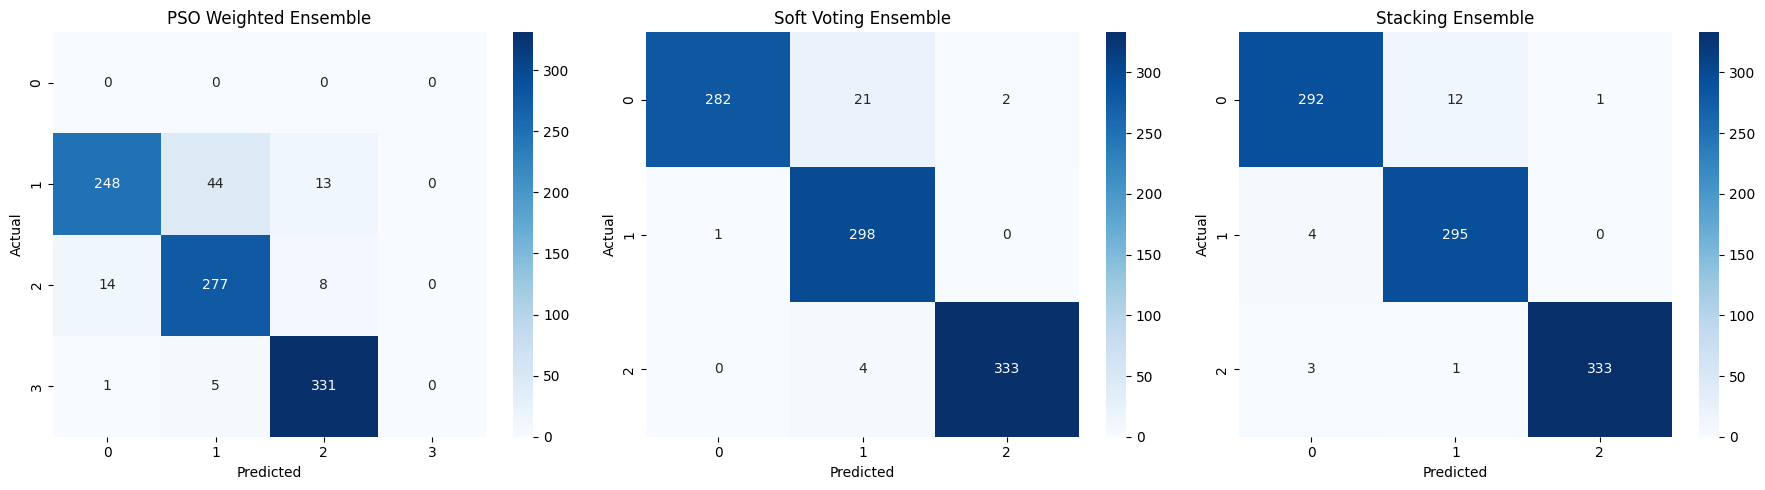

In [ ]:
### --- Confusion Matrices --- ###
print("\nConfusion Matrix - PSO Weighted Ensemble:")
print(confusion_matrix(y_test, y_pred_pso))

print("\nConfusion Matrix - Soft Voting Ensemble:")
print(confusion_matrix(y_test, y_pred_soft))

print("\nConfusion Matrix - Stacking Ensemble:")
print(confusion_matrix(y_test, y_pred_stack))

### --- Confusion Matrix Heatmaps --- ###
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cm_pso = confusion_matrix(y_test, y_pred_pso)
cm_soft = confusion_matrix(y_test, y_pred_soft)
cm_stack = confusion_matrix(y_test, y_pred_stack)

sns.heatmap(cm_pso, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("PSO Weighted Ensemble")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_soft, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Soft Voting Ensemble")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title("Stacking Ensemble")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
print("\nClassification Report - PSO Weighted Ensemble:")
print(classification_report(y_test, y_pred_pso))

print("\nClassification Report - Soft Voting Ensemble:")
print(classification_report(y_test, y_pred_soft))

print("\nClassification Report - Stacking Ensemble:")
print(classification_report(y_test, y_pred_stack))


Classification Report - PSO Weighted Ensemble:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.13      0.14      0.14       305
         2.0       0.02      0.03      0.02       299
         3.0       0.00      0.00      0.00       337

    accuracy                           0.06       941
   macro avg       0.04      0.04      0.04       941
weighted avg       0.05      0.06      0.05       941


Classification Report - Soft Voting Ensemble:
              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96       305
         2.0       0.92      1.00      0.96       299
         3.0       0.99      0.99      0.99       337

    accuracy                           0.97       941
   macro avg       0.97      0.97      0.97       941
weighted avg       0.97      0.97      0.97       941


Classification Report - Stacking Ensemble:
              precision    recall  f1-score  

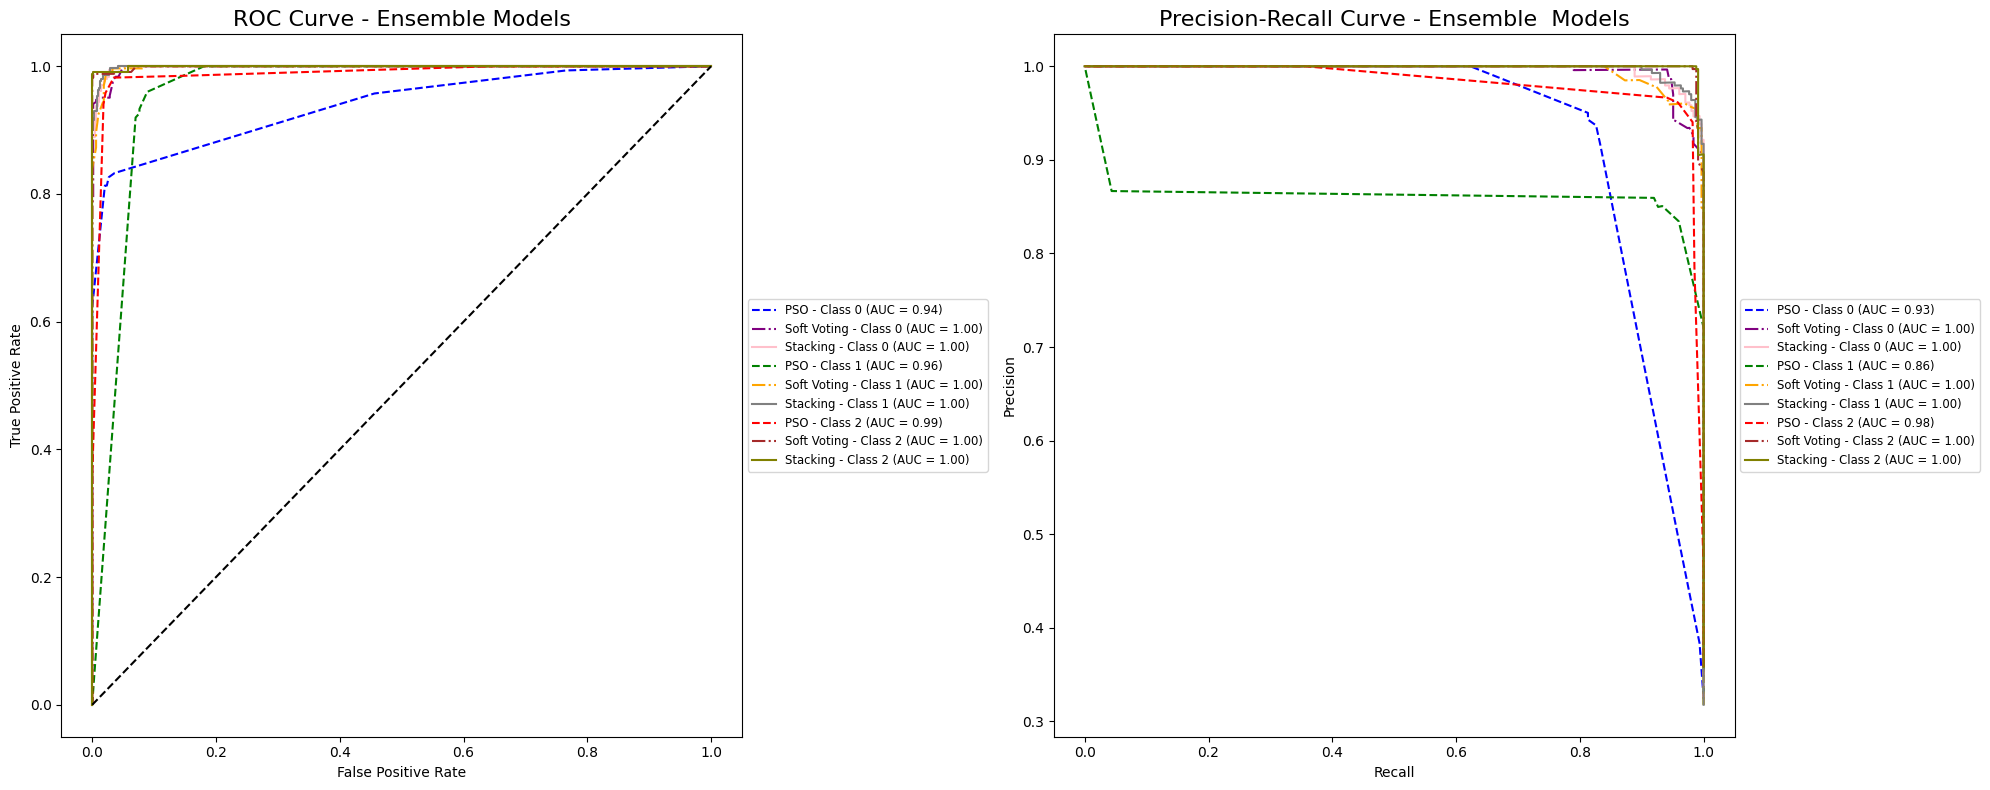

In [ ]:
# ✅ Define number of classes
n_classes = y_test_bin.shape[1]


### --- Combined ROC and PR curves --- ###
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# --- ROC CURVE --- #
for i in range(n_classes):
    fpr_pso, tpr_pso, _ = roc_curve(y_test_bin[:, i], y_prob_pso[:, i])
    fpr_soft, tpr_soft, _ = roc_curve(y_test_bin[:, i], y_prob_soft[:, i])
    fpr_stack, tpr_stack, _ = roc_curve(y_test_bin[:, i], y_prob_stack[:, i])

    axes[0].plot(fpr_pso, tpr_pso, linestyle='--', color=colors[i%len(colors)], label=f'PSO - Class {i} (AUC = {auc(fpr_pso, tpr_pso):.2f})')
    axes[0].plot(fpr_soft, tpr_soft, linestyle='-.', color=colors[(i+3)%len(colors)], label=f'Soft Voting - Class {i} (AUC = {auc(fpr_soft, tpr_soft):.2f})')
    axes[0].plot(fpr_stack, tpr_stack, linestyle='-', color=colors[(i+6)%len(colors)], label=f'Stacking - Class {i} (AUC = {auc(fpr_stack, tpr_stack):.2f})')

axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title('ROC Curve - Ensemble Models', fontsize=16)
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')


# --- PR CURVE --- #
for i in range(n_classes):
    prec_pso, rec_pso, _ = precision_recall_curve(y_test_bin[:, i], y_prob_pso[:, i])
    prec_soft, rec_soft, _ = precision_recall_curve(y_test_bin[:, i], y_prob_soft[:, i])
    prec_stack, rec_stack, _ = precision_recall_curve(y_test_bin[:, i], y_prob_stack[:, i])

    pr_auc_pso = auc(rec_pso, prec_pso)
    pr_auc_soft = auc(rec_soft, prec_soft)
    pr_auc_stack = auc(rec_stack, prec_stack)

    axes[1].plot(rec_pso, prec_pso, linestyle='--', color=colors[i%len(colors)], label=f'PSO - Class {i} (AUC = {pr_auc_pso:.2f})')
    axes[1].plot(rec_soft, prec_soft, linestyle='-.', color=colors[(i+3)%len(colors)], label=f'Soft Voting - Class {i} (AUC = {pr_auc_soft:.2f})')
    axes[1].plot(rec_stack, prec_stack, linestyle='-', color=colors[(i+6)%len(colors)], label=f'Stacking - Class {i} (AUC = {pr_auc_stack:.2f})')

axes[1].set_title('Precision-Recall Curve - Ensemble  Models', fontsize=16)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

# --- Calculate metrics for each ensemble method --- #
models = ['PSO Weighted Ensemble', 'Soft Voting Ensemble', 'Stacking Ensemble']
accuracies = []
precisions = []
recalls = []
f1_scores = []
aucs = []
auc_prs = []

# Binary format needed for AUC calculations
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#y_test_bin = label_binarize(y_test, classes=[0, 1, 2])


# PSO Metrics
accuracies.append(accuracy_score(y_test, y_pred_pso))
precisions.append(precision_score(y_test, y_pred_pso, average='weighted'))
recalls.append(recall_score(y_test, y_pred_pso, average='weighted'))
f1_scores.append(f1_score(y_test, y_pred_pso, average='weighted'))
aucs.append(roc_auc_score(y_test_bin, y_prob_pso, average='weighted', multi_class='ovr'))
auc_prs.append(average_precision_score(y_test_bin, y_prob_pso, average='weighted'))

# Soft Voting Metrics
accuracies.append(accuracy_score(y_test, y_pred_soft))
precisions.append(precision_score(y_test, y_pred_soft, average='weighted'))
recalls.append(recall_score(y_test, y_pred_soft, average='weighted'))
f1_scores.append(f1_score(y_test, y_pred_soft, average='weighted'))
aucs.append(roc_auc_score(y_test_bin, y_prob_soft, average='weighted', multi_class='ovr'))
auc_prs.append(average_precision_score(y_test_bin, y_prob_soft, average='weighted'))

# Stacking Metrics
accuracies.append(accuracy_score(y_test, y_pred_stack))
precisions.append(precision_score(y_test, y_pred_stack, average='weighted'))
recalls.append(recall_score(y_test, y_pred_stack, average='weighted'))
f1_scores.append(f1_score(y_test, y_pred_stack, average='weighted'))
aucs.append(roc_auc_score(y_test_bin, y_prob_stack, average='weighted', multi_class='ovr'))
auc_prs.append(average_precision_score(y_test_bin, y_prob_stack, average='weighted'))

# --- Create DataFrame --- #
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'AUC': aucs,
    'AUCPR': auc_prs
})

print("\nComparative Metrics Table:")
print(metrics_df)







Comparative Metrics Table:
                   Model  Accuracy  Precision    Recall  F1-Score       AUC  \
0  PSO Weighted Ensemble  0.055260   0.050968  0.055260  0.053012  0.962800   
1   Soft Voting Ensemble  0.970244   0.972123  0.970244  0.970291  0.998381   
2      Stacking Ensemble  0.977683   0.977928  0.977683  0.977700  0.999010   

      AUCPR  
0  0.910257  
1  0.996484  
2  0.998013  


In [ ]:
# 📌 Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 📌 Define the Optimization Function
def optimize_weights(metrics_df, n_iter=1000):
    best_score = -np.inf
    best_weights = None
    best_metrics_df = None

    for _ in range(n_iter):
        # Randomly generate weights that sum to 1
        random_weights = np.random.dirichlet(np.ones(metrics_df.shape[1] - 1), size=1)[0]

        # Prepare data (drop 'Model' column)
        X_metrics = metrics_df.drop('Model', axis=1)

        # Normalize the data
        scaler = MinMaxScaler()
        X_norm = scaler.fit_transform(X_metrics)

        # Calculate ideal best and worst
        ideal_best = np.max(X_norm, axis=0)
        ideal_worst = np.min(X_norm, axis=0)

        # Calculate distances
        distance_best = np.sqrt(np.sum(random_weights * (X_norm - ideal_best) ** 2, axis=1))
        distance_worst = np.sqrt(np.sum(random_weights * (X_norm - ideal_worst) ** 2, axis=1))

        # Calculate TOPSIS scores
        topsis_scores = distance_worst / (distance_best + distance_worst)

        # Use average TOPSIS score as the optimization target
        avg_score = np.mean(topsis_scores)

        # Update best if found better
        if avg_score > best_score:
            best_score = avg_score
            best_weights = random_weights
            best_metrics_df = metrics_df.copy()
            best_metrics_df['TOPSIS Score'] = topsis_scores
            best_metrics_df['Rank'] = best_metrics_df['TOPSIS Score'].rank(ascending=False, method='min')

            #best_metrics_df['Rank'] = topsis_scores.argsort()[::-1] + 1

    return best_metrics_df.sort_values('Rank'), best_weights

# 📌 Run the Optimization
final_leaderboard, best_weights = optimize_weights(metrics_df)

# 📌 Display Results
print("\n🏆 Optimized TOPSIS Leaderboard 🏆")
print(final_leaderboard[['Model', 'TOPSIS Score', 'Rank']])

print("\n🎯 Best Weights Found:", best_weights)

# 📌 Select Final Best Model
best_model_name = final_leaderboard.iloc[0]['Model']
print(f"\n🚀 Best Ensemble Model Selected: {best_model_name} ")



🏆 Optimized TOPSIS Leaderboard 🏆
                   Model  TOPSIS Score  Rank
2      Stacking Ensemble      1.000000   1.0
1   Soft Voting Ensemble      0.992789   2.0
0  PSO Weighted Ensemble      0.000000   3.0

🎯 Best Weights Found: [0.24448787 0.59504005 0.00543416 0.14464346 0.00926897 0.00112549]

🚀 Best Ensemble Model Selected: Stacking Ensemble 


# Saved Models

In [ ]:
import joblib
import os

# Create folder to save models
os.makedirs("/content/drive/MyDrive/fetal dataset /Saved Models File ", exist_ok=True)

# Base ML models
joblib.dump(LogisticRegression(), "/content/drive/MyDrive/fetal dataset /Saved Models File /logistic_regression_model.pkl")
joblib.dump(GaussianNB(), "/content/drive/MyDrive/fetal dataset /Saved Models File /gaussian_nb_model.pkl")         # GaussianNB
joblib.dump(clf, "/content/drive/MyDrive/fetal dataset /Saved Models File /adaboost_model.pkl")
joblib.dump(dt, "/content/drive/MyDrive/fetal dataset /Saved Models File /decision_tree_model.pkl")
joblib.dump(knn, "/content/drive/MyDrive/fetal dataset /Saved Models File /kneighbors_model.pkl")

# Ensemble models
joblib.dump(soft_vote, "/content/drive/MyDrive/fetal dataset /Saved Models File /soft_voting_model.pkl")
joblib.dump(stacking, "/content/drive/MyDrive/fetal dataset /Saved Models File /stacking_model.pkl")

# PSO-weighted voting (assumed to be soft_vote after weight assignment)
joblib.dump(soft_vote, "/content/drive/MyDrive/fetal dataset /Saved Models File /pso_weighted_voting_model.pkl")

print("✅ All 8 models saved successfully.")



✅ All 8 models saved successfully.


In [ ]:
import joblib

# Load base ML models
logistic_model = joblib.load("/content/drive/MyDrive/fetal dataset /Saved Models File /logistic_regression_model.pkl")
gaussian_nb_model = joblib.load("/content/drive/MyDrive/fetal dataset /Saved Models File /gaussian_nb_model.pkl")
clf = joblib.load("/content/drive/MyDrive/fetal dataset /Saved Models File /adaboost_model.pkl")
dt = joblib.load("/content/drive/MyDrive/fetal dataset /Saved Models File /decision_tree_model.pkl")
knn = joblib.load("/content/drive/MyDrive/fetal dataset /Saved Models File /kneighbors_model.pkl")

# Load ensemble models
soft_vote = joblib.load("/content/drive/MyDrive/fetal dataset /Saved Models File /soft_voting_model.pkl")
stacking = joblib.load("/content/drive/MyDrive/fetal dataset /Saved Models File /stacking_model.pkl")
pso_weighted_model = joblib.load("/content/drive/MyDrive/fetal dataset /Saved Models File /pso_weighted_voting_model.pkl")

print("✅ All 8 models loaded successfully.")


✅ All 8 models loaded successfully.


# Shap

PermutationExplainer explainer: 989it [31:13,  1.90s/it]


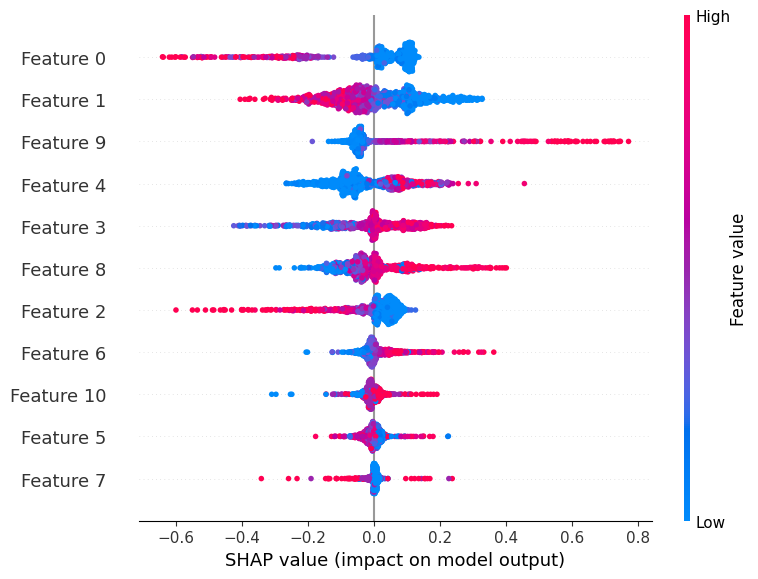

In [ ]:
import shap

# Use TreeExplainer if base models are tree-based, else Explainer (general)
explainer = shap.Explainer(stacking.predict, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Plot
shap.summary_plot(shap_values, X_test)
